In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LarsCV ,ElasticNet,ElasticNetCV
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [3]:
def adjr2(x,y):
    n = x.shape[0]
    p = x.shape[1]
    r2 = regression.score(x,y)
    adjusted_r2 = 1-(1-r2)*(n-1)/n-p-1
    return adjusted_r2

In [6]:
df = pd.read_csv(r'C:\1drive\OneDrive\Desktop\MACHINE LEARNING PRACTICE\Machine Learning Module 1-20220107T111833Z-001\Machine Learning Module 1\LinearRegression-master (1)\LinearRegression-master\LinearRegressionTillCloud\Admission_Prediction.csv')

In [7]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [9]:
df.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [14]:
df['University Rating'].mode()[0]

3.0

In [18]:
df['University Rating'].fillna(value=df['University Rating'].mode()[0], inplace=True)

In [26]:
df.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score           0
University Rating     0
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [23]:
round(df['TOEFL Score'].mean())

107

In [25]:
df['TOEFL Score'].fillna(value=round(df['TOEFL Score'].mean()), inplace=True)

In [29]:
round(df['GRE Score'].mean())

317

In [31]:
df['GRE Score'].fillna(value=round(df['GRE Score'].mean()), inplace=True)

In [34]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [35]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.572000,107.184000,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.104207,6.051395,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [36]:
df.drop('Serial No.', axis=1, inplace= True)

In [37]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,317.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


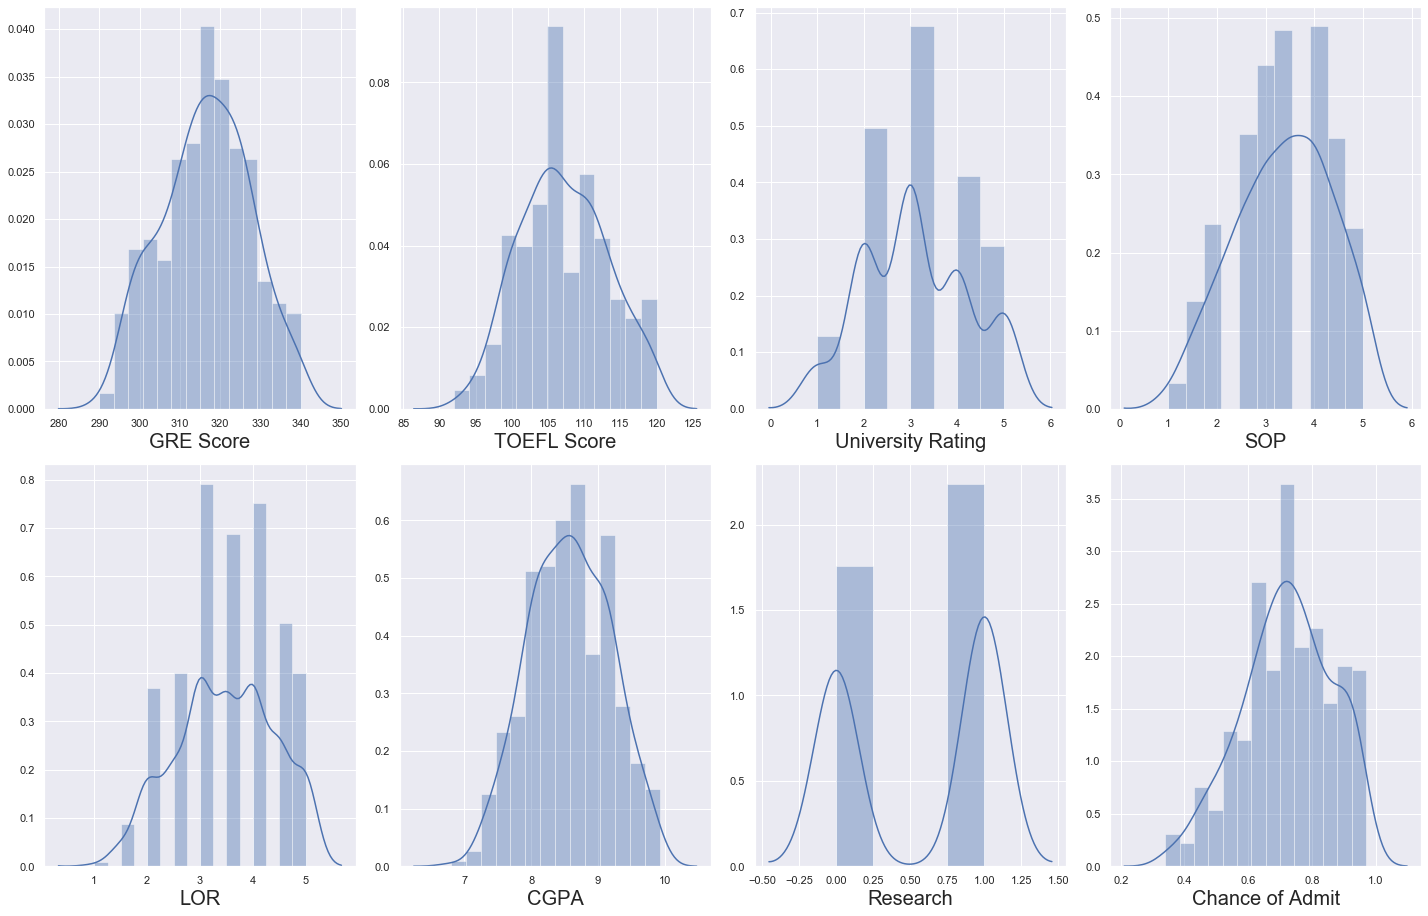

In [50]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for col in df:
    if plotnumber<=16:
        ax= plt.subplot(4,4,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize = 20)
        #plt.ylabel('salary', fontsize=20)
    plotnumber+=1
plt.tight_layout()

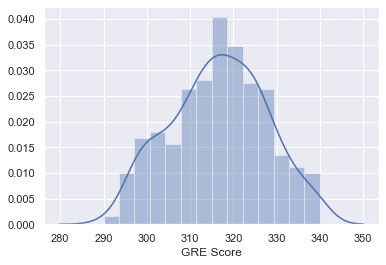

In [41]:
sns.distplot(df['GRE Score'])

In [52]:
y = df['Chance of Admit']

In [54]:
x = df.drop(columns=['Chance of Admit'])

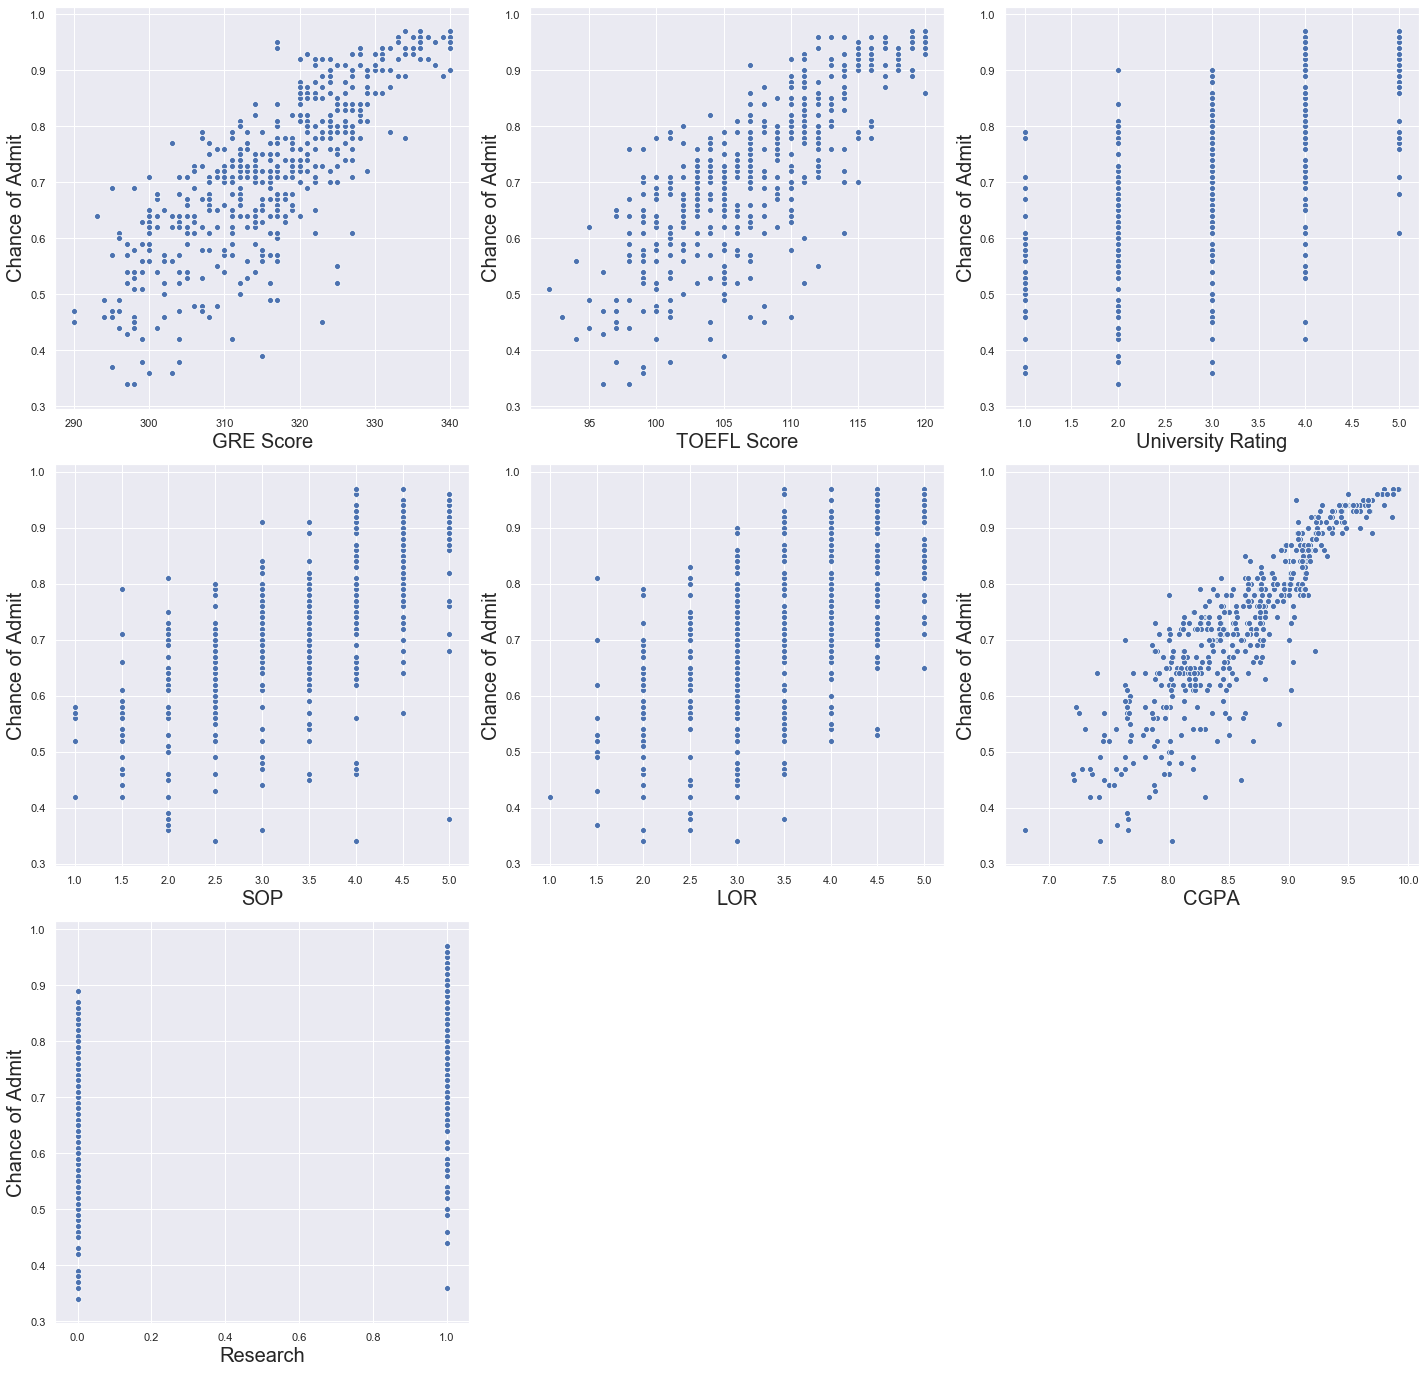

In [70]:
plt.figure(figsize=(20,25))
plotnumber = 1

for col in x:
    if plotnumber<=16:
        ax = plt.subplot(4,3,plotnumber)
        sns.scatterplot(x[col], y=y, data=df)
        plt.xlabel(col,fontsize = 20)
        plt.ylabel('Chance of Admit', fontsize= 20)
    plotnumber+=1
plt.tight_layout()

In [71]:
ss = StandardScaler()

In [72]:
x_scaled = ss.fit_transform(x)

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
variables = x_scaled

In [76]:
variables

array([[ 1.84150547,  1.78914648,  0.78200955, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66960557, -0.03043666,  0.78200955, ...,  1.09894429,
         0.48585943,  0.88640526],
       [ 0.03858255, -0.52668661, -0.10462259, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.21048245,  2.11997978,  1.66864169, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.41214818, -0.69210326,  0.78200955, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.94004401,  0.96206323,  0.78200955, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [78]:
vif = pd.DataFrame()

In [82]:
vif['VIF'] =[variance_inflation_factor(variables,i) for i in range(variables.shape[1])]

In [83]:
vif

,VIF
0,4.154712
1,3.795794
2,2.517273
3,2.776399
4,2.037378
5,4.653172
6,1.458962


In [84]:
vif['Features']= x.columns

In [85]:
vif

,VIF,Features
0,4.154712,GRE Score
1,3.795794,TOEFL Score
2,2.517273,University Rating
3,2.776399,SOP
4,2.037378,LOR
5,4.653172,CGPA
6,1.458962,Research


In [86]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = 355)

In [89]:
y_train

378    0.56
23     0.95
122    0.57
344    0.47
246    0.72
       ... 
51     0.56
291    0.56
346    0.47
130    0.96
254    0.85
Name: Chance of Admit, Length: 375, dtype: float64

In [90]:
regression = LinearRegression()

In [91]:
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
filename = 'myresgression_model.pickle'

In [93]:
import pickle

In [94]:
pickle.dump(regression,open(filename, "wb"))

In [96]:
loaded_model = pickle.load(open(filename,"rb"))

In [102]:
preds = loaded_model.predict(ss.transform([[200,100,6,6,6,11,2]]))

In [103]:
preds

array([0.8656703])

In [104]:
regression.score(X_train,y_train)

0.8414358308911176

In [105]:
adjr2(X_train,y_train)

-7.158141331324592

In [106]:
regression.score(X_test,y_test)

0.7536853549875405

In [107]:
adjr2(X_test,y_test)

-7.24434412785236

In [112]:
lasscv = LassoCV(verbose=True, normalize=True, max_iter=100000, cv=10,alphas = None)

In [110]:
from sklearn.linear_model import LassoCV

In [113]:
lasscv.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=True)

In [115]:
alpha =lasscv.alpha_

In [116]:
print(alpha)

3.0341655445178153e-05


In [117]:
lasso_reg = Lasso(alpha)

In [118]:
lasso_reg.fit(X_train,y_train)

Lasso(alpha=3.0341655445178153e-05, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [119]:
lasso_reg.score(X_test,y_test)

0.7536609163964709

In [126]:
ridgecv = RidgeCV(normalize=True,cv = 10, alphas = alphas)

In [124]:
alphas = np.random.uniform(0,10, size = (50,))

In [127]:
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([8.64459274, 6.61787837, 3.39314048, 0.04131198, 6.92448765,
       7.49854789, 7.50359587, 8.90677778, 9.88438423, 0.66832375,
       1.41568744, 6.71275803, 7.54640831, 8.16769438, 7.32227   ,
       4.05295516, 9.33302687, 8.32598869, 5.66190321, 7.52255987,
       4.40946978, 4.10948753, 2.75170002, 1.93107185, 6.70970497,
       3.1005265 , 2.55479884, 4.03732011, 5.96007099, 0.65765176,
       0.85232758, 4.8298728 , 7.20539128, 2.62027473, 5.91908512,
       1.42141365, 1.02158471, 7.03485854, 9.75686215, 1.52923549,
       8.61257079, 8.46598242, 0.66891617, 6.73164835, 8.07098136,
       8.06868353, 4.98397619, 1.08888218, 4.75822266, 5.33092502]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [128]:
ridgecv.alpha_

0.04131197581792034

In [130]:
ridge_model = Ridge(alpha=ridgecv.alpha_)

In [131]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.04131197581792034, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [132]:
ridge_model.score(X_train,y_train)

0.8414358181644579

In [133]:
ridge_model.score(X_test,y_test)

0.7537056373735562

In [134]:
elastinetcv = ElasticNetCV(alphas=None, cv = 10, normalize=True)

In [135]:
elastinetcv.fit(X_train,y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=True, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [136]:
elastinetcv.alpha_

6.0683310890356314e-05

In [137]:
elasticnet_reg = ElasticNet(alpha=elastinetcv.alpha_, l1_ratio=elastinetcv.l1_ratio)

In [138]:
elasticnet_reg.fit(X_train,y_train)

ElasticNet(alpha=6.0683310890356314e-05, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [139]:
elasticnet_reg.score(X_train,y_train)

0.841435751274864

In [140]:
elasticnet_reg.score(X_test,y_test)

0.7536665174783375

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [145]:
df = pd.read_csv(r'C:\1drive\OneDrive\Desktop\MACHINE LEARNING PRACTICE\Machine Learning Module 1-20220107T111833Z-001\Machine Learning Module 1\LinearRegression-master (1)\LinearRegression-master\LinearRegressionTillCloud\Position_Salaries.csv')

In [146]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [152]:
x = df.iloc[:,1:2].values

In [155]:
df.iloc[:, 1].values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [156]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [160]:
y = df.iloc[:,2].values

In [161]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [163]:
lin_reg = LinearRegression()

In [164]:
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

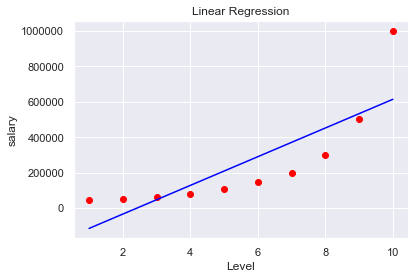

In [171]:
plt.scatter(x,y,color = 'red')
plt.plot(x,lin_reg.predict(x), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Level')
plt.ylabel('salary')
plt.show()

In [173]:
from sklearn.preprocessing import PolynomialFeatures

In [175]:
poly_reg = PolynomialFeatures(degree=2)

In [177]:
X_poly = poly_reg.fit_transform(x)

In [178]:
print(X_poly)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


In [179]:
poly_reg.fit(X_poly,y)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [180]:
lin_reg_2 = LinearRegression()

In [181]:

lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

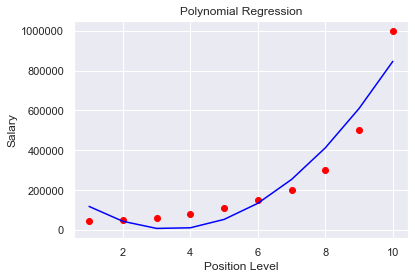

In [185]:
plt.scatter(x,y, color ='red')
plt.plot(x,lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [186]:
plot_reg = PolynomialFeatures(degree=4)

In [192]:
X_poly1 = plot_reg.fit_transform(x)

In [202]:
print(X_poly1)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


In [203]:
plot_reg.fit(X_poly1,y)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                   order='C')

In [204]:
lin_reg_3 = LinearRegression()

In [205]:
lin_reg_3.fit(X_poly1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

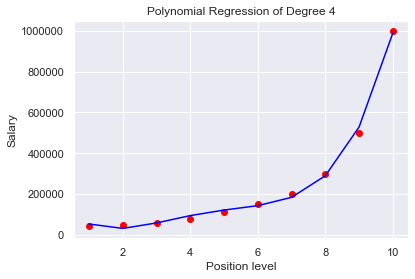

In [206]:
plt.scatter(x,y,color = 'red')
plt.plot(x,lin_reg_3.predict(plot_reg.fit_transform(x)), color = 'blue')
plt.title('Polynomial Regression of Degree 4')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()